In [1]:
using QuantumOptics
using PyPlot
const ce = correlationexpansion;

In [10]:
xmin = -6
xmax = 6
Npoints = 100
L = xmax - xmin
dx = L/Npoints
xpoints = [xmin:dx:xmax-dx;]

index_coupling = Int(floor(Nsteps/2))

g = 1/2dx
g_atom = 0.4g;

In [11]:
b_atom = NLevelBasis(2)
t21 = transition(b_atom, 2, 1)
t12 = transition(b_atom, 1, 2)

b_fock = FockBasis(1)
a = destroy(b_fock)
at = create(b_fock)
n = number(b_fock)

b_space = tensor([b_fock for i=1:Npoints]...)
b = b_atom ⊗ b_space

H = LazyTensor[]
for i=2:Npoints
    push!(H, g*LazyTensor(b, [i, i+1], [at, a]))
    push!(H, g*LazyTensor(b, [i, i+1], [a, at]))
    
end

push!(H, g_atom*LazyTensor(b, [1, index_coupling+1], [t21, a]))
push!(H, g_atom*LazyTensor(b, [1, index_coupling+1], [t12, at]))

H = LazySum(H...)
J = LazyTensor[];

In [12]:
# S_space = [[i, i+1] for i=2:Npoints-1]
# S = [[1, index_coupling+1]] ∪ S_space
S = Vector{Int}[]

vac = fockstate(b_fock, 0) ⊗ dagger(fockstate(b_fock, 0))
ρ0_space = [vac for i=1:Npoints]

psi_e = nlevelstate(b_atom, 2)
psi_g = nlevelstate(b_atom, 1)
psi = normalize(psi_e + psi_g)
ρ0_atom = psi ⊗ dagger(psi)

operators = [ρ0_atom; ρ0_space]
ρ0 = ce.CorrelationExpansion(operators, S);

T = [0:1.:5;]
tout, ρt_ce = ce.master(T, ρ0, H, J);

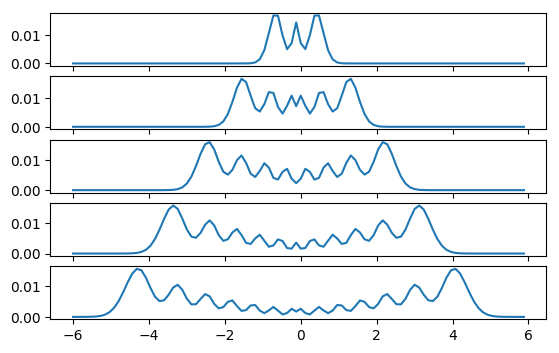

In [13]:
for i_t=2:length(T)
    subplot(length(T), 1, i_t)
    plot(xpoints, [expect(i+1, n, ρt_ce[i_t]) for i=1:Npoints])
end

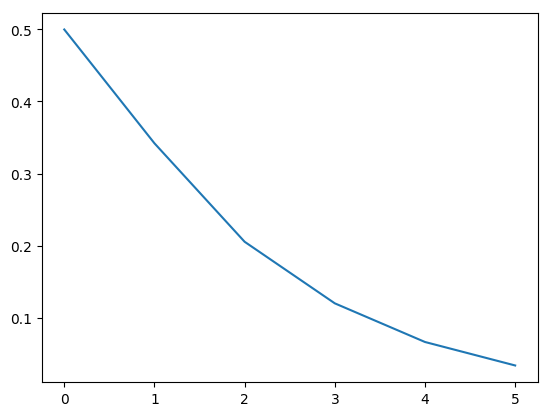

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fde9987e080>

In [16]:
plot(T, expect(1, psi_e⊗dagger(psi_e), ρt_ce))

In [7]:
T = [0:0.1:5;]

tout, ρt_ce = ce.master(T, ρ0, H, J);
tout, ρt = timeevolution.master(T, full(ρ0), full(H), []);

LoadError: UndefVarError: ρ0 not defined

In [8]:
plot(tout, expect(1, t21*t12, ρt_ce))
plot(tout, expect(1, t21*t12, ρt), "--")
# plot(tout, map(x->trace(full(x)), ρt_ce))

LoadError: UndefVarError: tout not defined

In [9]:
"""
Probability density in the position basis of the given many body state.
"""
function probabilitydensity_x(state)
    n = Vector{Float64}(length(state))
    for i=1:length(indices)
        nx_i = nx(b_position, indices[i])
        nx_i_mb = manybodyoperator(b_mb, nx_i)
        n[i] = real(expect(nx_i_mb, state))
    end
    n
end;